In [1]:
import tangram as tg
import pandas as pd
import numpy as np
import anndata as ad
from scipy.sparse import csr_matrix

single cell data conversion (data log CPM from shiny)

In [2]:
macaque_shiny_path = '//allen/programs/celltypes/workgroups/rnaseqanalysis/Nik/Analyses_for_great_apes_paper/Shiny_obj/rhesus/'

In [28]:
sc_data = pd.read_feather(macaque_shiny_path + 'data.feather')
sc_data.set_index('sample_id', inplace=True)
sc_data.head()

KeyboardInterrupt: 

In [10]:
sc_data_matrix = sc_data.to_numpy()
# sc_data_sparse = csr_matrix(sc_data_matrix, dtype=np.float32)

In [13]:
sc_data_matrix.shape

(89695, 40280)

In [14]:
sc_anno = pd.read_feather(macaque_shiny_path + 'anno.feather')
sc_anno.set_index('sample_id', inplace=True)
sc_anno = sc_anno[['class_label', 'neighborhood_label', 'subclass_label', 'cluster_label']]
sc_anno.head()

,class_label,neighborhood_label,subclass_label,cluster_label
sample_id,,,,
AAACCCAAGGATGGCT-1L8TX_191119_01_A10,GABAergic,lamp5_sncg_vip,Lamp5,Lamp5_1
AAATGGACAAAGGAGA-1L8TX_191119_01_A10,GABAergic,lamp5_sncg_vip,Lamp5,Lamp5_1
AACCAACGTATCCTTT-1L8TX_191119_01_A10,GABAergic,lamp5_sncg_vip,Lamp5,Lamp5_1
ACACCAACACCAGTAT-1L8TX_191119_01_A10,GABAergic,lamp5_sncg_vip,Lamp5,Lamp5_1
ACAGCCGAGAGTTGCG-1L8TX_191119_01_A10,GABAergic,lamp5_sncg_vip,Lamp5,Lamp5_1


In [18]:
cells = sc_data.index.to_numpy(dtype='object')
cells

array(['AAACCCAAGATCACCT-1L8TX_191119_01_A10',
       'AAACCCACAAACACCT-1L8TX_191119_01_A10',
       'AAACCCACATCAACCA-1L8TX_191119_01_A10', ...,
       'TTTGTTGCAGACGGAT-12L8TX_191126_01_D02',
       'TTTGTTGTCGAGAGCA-12L8TX_191126_01_D02',
       'TTTGTTGTCTGCAGCG-12L8TX_191126_01_D02'], dtype=object)

In [20]:
genes = sc_data.columns.to_numpy(dtype='object')
genes

array(['PGBD2', 'LOC114674980', 'TRNAE-CUC', ..., 'ND5', 'ND6', 'CYTB'],
      dtype=object)

In [15]:
sc_ad = ad.AnnData(sc_data_matrix)

In [30]:
print(sc_ad.X.shape)
sc_ad.X

(89695, 40280)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
sc_ad.obs_names = cells
sc_ad.var_names = genes
print(sc_ad.obs_names[:10])

Index(['AAACCCAAGATCACCT-1L8TX_191119_01_A10',
       'AAACCCACAAACACCT-1L8TX_191119_01_A10',
       'AAACCCACATCAACCA-1L8TX_191119_01_A10',
       'AAACGAACATCCAACA-1L8TX_191119_01_A10',
       'AAACGAACATGTCTAG-1L8TX_191119_01_A10',
       'AAACGAAGTACGAGCA-1L8TX_191119_01_A10',
       'AAACGCTAGCACACCC-1L8TX_191119_01_A10',
       'AAAGAACAGTGCACCC-1L8TX_191119_01_A10',
       'AAAGAACTCGTCAAAC-1L8TX_191119_01_A10',
       'AAAGTGATCTGTCGTC-1L8TX_191119_01_A10'],
      dtype='object')


In [34]:
sc_ad.obs['cluster'] = sc_anno['cluster_label']
sc_ad.obs['subclass'] = sc_anno['subclass_label']
sc_ad.obs['neighborhood'] = sc_anno['neighborhood_label']
sc_ad.obs['class'] = sc_anno['class_label']
sc_ad.obs

,cluster,subclass,neighborhood,class
AAACCCAAGATCACCT-1L8TX_191119_01_A10,Oligo_1,Oligo,glia,Non-neuronal
AAACCCACAAACACCT-1L8TX_191119_01_A10,Oligo_2,Oligo,glia,Non-neuronal
AAACCCACATCAACCA-1L8TX_191119_01_A10,OPC_2,OPC,glia,Non-neuronal
AAACGAACATCCAACA-1L8TX_191119_01_A10,Oligo_2,Oligo,glia,Non-neuronal
AAACGAACATGTCTAG-1L8TX_191119_01_A10,Oligo_2,Oligo,glia,Non-neuronal
...,...,...,...,...
TTTGGTTAGGATATGT-12L8TX_191126_01_D02,L4 IT_1,L4 IT,it_types,Glutamatergic
TTTGGTTCAACATCGT-12L8TX_191126_01_D02,L5 IT_4,L5 IT,it_types,Glutamatergic
TTTGTTGCAGACGGAT-12L8TX_191126_01_D02,L4 IT_2,L4 IT,it_types,Glutamatergic
TTTGTTGTCGAGAGCA-12L8TX_191126_01_D02,L4 IT_1,L4 IT,it_types,Glutamatergic


In [16]:
import scanpy as sc

sc_raw = sc.read_h5ad('C://Users/stephanies/data/macaque_sc_raw.h5ad')
sc_raw

AnnData object with n_obs × n_vars = 40280 × 89695

In [23]:
sc_raw.T.X

<89695x40280 sparse matrix of type '<class 'numpy.float32'>'
	with 413909065 stored elements in Compressed Sparse Row format>

In [18]:
sc_ad = sc.read_h5ad('C://Users/stephanies/data/macaque_sc_logcpm.h5ad')

In [24]:
sc_ad.layers['log_cpm'] = sc_ad.X
sc_ad.X = sc_raw.T.X
sc_ad

AnnData object with n_obs × n_vars = 89695 × 40280
    obs: 'cluster', 'subclass', 'neighborhood', 'class'
    layers: 'log_cpm'

In [25]:
sc_ad.write('C://Users/stephanies/data/macaque_sc_all.h5ad')

BGI data conversion

In [10]:
st_data = pd.read_csv('C://Users/stephanies/data/BGI_data/cDNAC4/bin100.csv')
st_data.set_index('cell', inplace=True)
st_data.head()

,A1BG,A1CF,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL2,...,ZW10,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
cell,,,,,,,,,,,,,,,,,,,,,
sample_cDNAC4:10000_10000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
sample_cDNAC4:10000_10100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
sample_cDNAC4:10000_10200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sample_cDNAC4:10000_10300,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
sample_cDNAC4:10000_10400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
st_data['x'] = st_data.apply(lambda x: float(x.name.split(':')[1].split('_')[0]), axis=1)
st_data['y'] = st_data.apply(lambda x: float(x.name.split(':')[1].split('_')[1]), axis=1)

In [3]:
st_data['x'] = st_data.apply(lambda x: float(x.name.split('x')[0]), axis=1)
st_data['y'] = st_data.apply(lambda x: float(x.name.split('x')[1]), axis=1)

In [12]:
st_data_matrix = st_data.to_numpy()
st_data_matrix.shape

(25164, 29694)

In [13]:
st_ad = ad.AnnData(st_data_matrix)

In [14]:
st_ad.X

array([[    0.,     0.,     0., ...,     0., 10000., 10000.],
       [    0.,     0.,     0., ...,     0., 10000., 10100.],
       [    0.,     0.,     0., ...,     0., 10000., 10200.],
       ...,
       [    0.,     0.,     0., ...,     0.,  9900.,  9700.],
       [    0.,     0.,     0., ...,     0.,  9900.,  9800.],
       [    0.,     0.,     0., ...,     0.,  9900.,  9900.]],
      dtype=float32)

In [15]:
st_ad.obs_names = st_data.index.to_numpy(dtype='object')
st_ad.var_names = st_data.columns.to_numpy(dtype='object')
print(st_ad.obs_names[:10])

Index(['sample_cDNAC4:10000_10000', 'sample_cDNAC4:10000_10100',
       'sample_cDNAC4:10000_10200', 'sample_cDNAC4:10000_10300',
       'sample_cDNAC4:10000_10400', 'sample_cDNAC4:10000_10500',
       'sample_cDNAC4:10000_10600', 'sample_cDNAC4:10000_10700',
       'sample_cDNAC4:10000_10800', 'sample_cDNAC4:10000_10900'],
      dtype='object')


In [16]:
st_ad.obs['x'] = st_data['x'].to_numpy(dtype=float)
st_ad.obs['y'] = st_data['y'].to_numpy(dtype=float)
st_ad.obs

,x,y
sample_cDNAC4:10000_10000,10000.0,10000.0
sample_cDNAC4:10000_10100,10000.0,10100.0
sample_cDNAC4:10000_10200,10000.0,10200.0
sample_cDNAC4:10000_10300,10000.0,10300.0
sample_cDNAC4:10000_10400,10000.0,10400.0
...,...,...
sample_cDNAC4:9900_9500,9900.0,9500.0
sample_cDNAC4:9900_9600,9900.0,9600.0
sample_cDNAC4:9900_9700,9900.0,9700.0
sample_cDNAC4:9900_9800,9900.0,9800.0


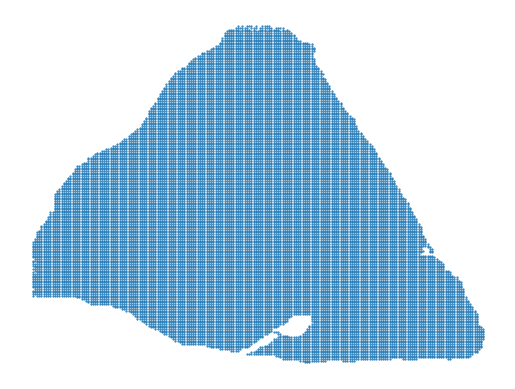

In [17]:
import matplotlib.pyplot as plt

xs = st_ad.obs.x.values
ys = st_ad.obs.y.values
plt.axis('off')
plt.scatter(xs, ys, s=.3);
# plt.gca().invert_yaxis()

In [18]:
st_ad.write('C://Users/stephanies/data/BGI_data/cDNAC4/bin100.h5ad')